# Remark
## インプットファイルの要件
- 元データのCSVが時系列順で[ForwardBG, signal, BackwardBG]の順に並んでいる。
- ch1で奇数番目のファイバー、ch2で偶数番目のファイバーを読んでいる(ch2を使わない場合はch2を無視して良い。)
- ch1のファイバー番号の方がch2のファイバー番号より若い

In [2]:
# csvファイルを読み込んで1次元配列を作る。[1st_fbg,2nd_fbg,1st_sig,2nd_sig,1st_bbg,2nd_bbg]
# 1次元配列から2列の2次元配列を作成。ヘッダは[ch1,ch2]\
# |ch1|ch2|\
# |1st_fbg|2nd_fbg|\
# |1st_sig|2nd_sig|\
# |1st_bbg|2nd_bbg|
# 
# 3n行目の値と3n+2行目の値の平均をとって3n+1行目の値から引く(n=0,1,2,3...)
# その値を新しいリストに詰める。
import glob as glob
import pandas as pd 
import numpy as np 
import csv

# date = '2023-11-15-194738' # 131℃20min溶着前
# date = '2023-11-15-224348' # 131℃20min溶着後

#date = '2023-11-12-131514' # 137℃10min溶着前
#date = '2023-11-12-182201' # 137℃10min溶着後

date = '2023-11-19-110826' # 131℃20min溶着後 retake

outFileName = f'output_logger2signal{date}.csv'
csv_files = sorted(glob.glob(f'../logger_data/{date}/*.csv'))

In [2]:
# make 1D array from csv
data_1dim = np.empty(0)
for file in csv_files:
    mydf = pd.read_csv(file,
                           names=['No.', 'time', 'ms', 'Ch1 [V]', 'Ch2 [V]'
                                  , 'Ch3 [V]', 'Ch4 [V]'
                                  , 'Alarm [V]', 'AlarmOut [V]'],
                           usecols=[ 'Ch1 [V]', 'Ch2 [V]' ],
                           encoding="Shift-JIS", 
                           skiprows=21)
    
    mean_ch1: float =0
    mean_ch2: float =0
    mean_ch1 = mydf['Ch1 [V]'].mean(numeric_only=True)
    mean_ch2 = mydf['Ch2 [V]'].mean(numeric_only=True)

    data_1dim = np.append(data_1dim, [mean_ch1,mean_ch2])
nrows = len(data_1dim) // 2
data_2dim = data_1dim.reshape(nrows,2)
print("data_2dim=",data_2dim)

data_2dim= [[0.00464    0.0048    ]
 [2.88294118 2.30082353]
 [0.00415152 0.00433333]
 [0.004      0.0044    ]
 [2.67578788 1.94278788]
 [0.00402439 0.00421951]]


In [3]:
# ループの回数（n）を決定
n = data_2dim.shape[0] // 3
print(n)
outputdata = np.empty(0)

# 3n行目と3n+2行目の平均を計算して3n+1行目から引いて、ndarray型のoutputdataに詰める。
for i in range(n):
    row1 = data_2dim[3 * i]
    row2 = data_2dim[3 * i + 2]
    average = (row1 + row2) / 2
    outputdata = np.append(outputdata,data_2dim[3 * i + 1]-average)
    #print(data_2dim[3*i+1])
print(outputdata)


2
[2.87854542 2.29625686 2.67177568 1.93847812]


In [4]:
#データフレームからCSVに書き出す。
df = pd.DataFrame(outputdata
                  ,columns=['fiber signals [V]']
                  )
df.to_csv(f'output_LoggerCSVs2FiberSignal/{outFileName}'
          ,index=False
          )

In [12]:

df0 = pd.read_csv('../output_LoggerCSVs2FiberSignal/output_logger2signal2023-11-12-131514.csv')
df1 = pd.read_csv('../output_LoggerCSVs2FiberSignal/output_logger2signal2023-11-12-182201.csv')

for df in df0,df1:
    df.index += 1
    print(df)

df_loss = 1-df1/df0
#df_loss = df_loss.rename(columns=0
                         #{'fiber signals [V]':'loss ratio'}) 
print(df_loss)

mean_loss = df_loss.mean(numeric_only=True)

print("\n","mean loss=",mean_loss)


    Unnamed: 0  fiber signals [V]
1            0           3.798733
2            1           3.401549
3            2           4.194870
4            3           3.079888
5            4           4.065478
6            5           2.715957
7            6           4.103517
8            7           3.080832
9            8           4.041787
10           9           3.293106
    Unnamed: 0  fiber signals [V]
1            0           2.837255
2            1           2.285888
3            2           3.905133
4            3           2.649433
5            4           3.663805
6            5           2.267931
7            6           3.621251
8            7           2.526028
9            8           3.612993
10           9           2.908277
    Unnamed: 0  fiber signals [V]
1          NaN           0.253105
2          0.0           0.327986
3          0.0           0.069069
4          0.0           0.139763
5          0.0           0.098801
6          0.0           0.164961
7          0.0

    fiber signals [V]
1            2.435360
2            2.658459
3            2.957876
4            2.018335
5            3.609278
6            2.519631
7            3.250293
8            2.530256
9            2.884150
10           2.157841
    fiber signals [V]
1            2.232542
2            2.508908
3            2.801289
4            1.963373
5            2.878545
6            2.287752
7            2.975535
8            2.221858
9            2.671776
10           2.094709
    fiber signals [V]
1            0.916719
2            0.943745
3            0.947061
4            0.972768
5            0.797541
6            0.907971
7            0.915466
8            0.878116
9            0.926365
10           0.970743

 mean loss= fiber signals [V]    0.91765
dtype: float64


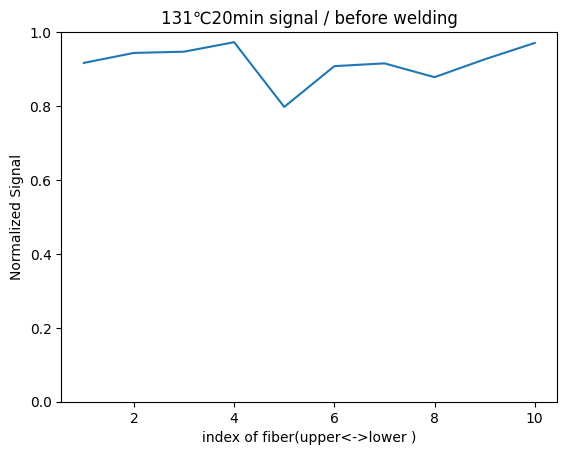

In [11]:
df0 = pd.read_csv('../output_LoggerCSVs2FiberSignal/output_logger2signal2023-11-15-194738.csv')
df1 = pd.read_csv('../output_LoggerCSVs2FiberSignal/output_logger2signal2023-11-19-110826_2023-11-15-224348.csv')
for df in df0,df1:
    df.index += 1
    print(df)
df_loss = df1/df0
#df_loss = df_loss.rename(columns=0
                         #{'fiber signals [V]':'loss ratio'}) 
print(df_loss)
ax = df_loss.plot(title='131℃20min signal / before welding',legend='')
ax.set_xlabel('index of fiber(upper<->lower )')
ax.set_ylabel('Normalized Signal')
ax.set_ylim([0,1])
mean_loss = df_loss.mean(numeric_only=True)

print("\n","mean loss=",mean_loss)
df_loss.to_csv(f'../output_LoggerCSVs2FiberSignal/131℃20min_retake.csv'
          ,index=False
          )


# 2023/11/19
131℃20minにおいて、
前回の測定では5と9のファイバーがちゃんと刺さっていなかったようだった。この2本のファイバーに関して新たにデータを取り直した。